In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline # To display the plot after the command , we need not use plt.show() if we use this

In [9]:
birth_data = pd.read_csv('birth_us.csv',index_col=[0],parse_dates=[0],squeeze=True)
# squeeze=True changes the format from Data Frame to Series.

In [10]:
birth_data.head()
# Python by default create index

Date
2019-01-01    36
2019-01-02    93
2019-01-03     8
2019-01-04    50
2019-01-05     7
Name: DailyBirth, dtype: int64

In [11]:
type(birth_data)

pandas.core.series.Series

In [15]:
# value from DataFrame is converted into series.
series_value = birth_data.values

In [17]:
series_value

array([ 36,  93,   8,  50,   7,  25,  65,  48,  19,  73,  47,   4,  14,
        10,  62,  19,  97,   7,   9,  61,  30,  38,  21,  66,  67,  19,
        97,  81,  88,  62,  81,   6,  40,  41,  90,  11,  37,  26,  72,
        20,  98,  47,  45,  62,  10,  89,  31,  35,  80,   2,  17,  36,
        51,  33,  64,  90,  91,  49,  16,  17,  57,  65,  22,  15,  47,
        56,  35,   7,  28,  17,   7,  98,  77,  49,  87,  33,  30,  71,
        25,  38,  65,  93,   2,  87,  58,  56,  65,  69,  48,   7,  22,
         1,  84,  89,  74,  59,  56,  29,  70,  84,  64,  40,  94,   0,
        39,  12,  16,  87,  12,  14,  80,  58,   2,   0,  80,  86,  93,
        93,  25,  57,  59,  51,  58,   3,  60,  42,  10,  53,  98,  50,
        39,  93,  51,  90,  92,  32,  92,  85,  63,  96,   9,  30,  51,
        59,   5,  78,  46,  12,   4,  13,  92,  55,  25,  22,  99,  22,
        52,  13,  75,  21,  55,  39,  37,  46,  40,  46,  82,   9,   0,
        26,  81,  80,  37,   5,  97,  50,  11,  66,  42,  39,  3

In [16]:
type(series_value)

numpy.ndarray

In [18]:
birth_data.size

790

In [19]:
birth_data.tail()

Date
2021-02-24     8
2021-02-25    47
2021-02-26    27
2021-02-27    78
2021-02-28     0
Name: DailyBirth, dtype: int64

In [20]:
birth_data.describe()

count    790.000000
mean      49.886076
std       29.166446
min        0.000000
25%       25.000000
50%       51.000000
75%       74.750000
max      100.000000
Name: DailyBirth, dtype: float64

<AxesSubplot:xlabel='Date'>

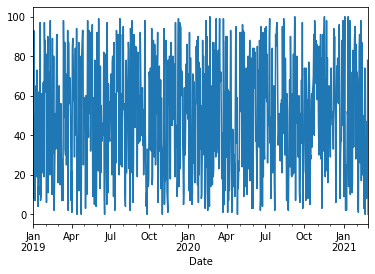

In [21]:
birth_data.plot()

In [23]:
#Smoothings the series with moving average.
birth_data_mean = birth_data.rolling(window = 20).mean()

<AxesSubplot:xlabel='Date'>

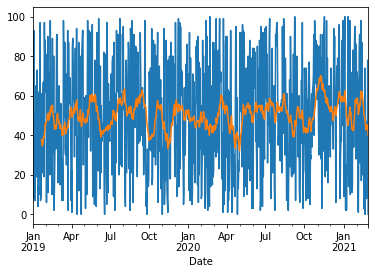

In [24]:
birth_data.plot()

<AxesSubplot:xlabel='Date'>

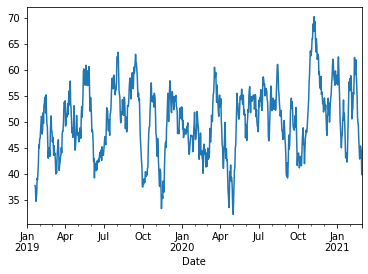

In [25]:
birth_data_mean.plot()

In [26]:
# we lot of models , linear model is very simple. 
value = pd.DataFrame(series_value)

In [27]:
birth_df = pd.concat([value,value.shift(1)],axis=1)

In [28]:
birth_df.head()

,0,0
0,36,NaN
1,93,36.0
2,8,93.0
3,50,8.0
4,7,50.0


In [29]:
birth_df.columns = ['Actual_birth','Forecast_birth']

In [30]:
birth_df.head()

,Actual_birth,Forecast_birth
0,36,NaN
1,93,36.0
2,8,93.0
3,50,8.0
4,7,50.0


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [44]:
birth_test = birth_df[1:]

In [45]:
birth_test.head()

,Actual_birth,Forecast_birth
1,93,36.0
2,8,93.0
3,50,8.0
4,7,50.0
5,25,7.0


In [41]:
birth_test.tail()

,Actual_birth,Forecast_birth
785,8,26.0
786,47,8.0
787,27,47.0
788,78,27.0
789,0,78.0


In [48]:
# This will thorw an error , as the first row does not have any value. We have NAN. 
# birth_test is the new dataset created with out NAN values in the row

birth_error = mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [49]:
birth_error

1667.318124207858

In [50]:
np.sqrt(birth_error)

40.83280695969673

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

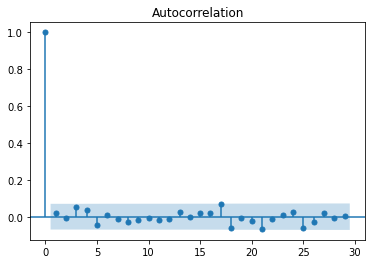

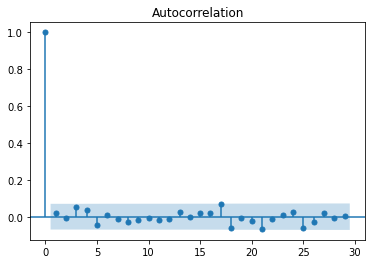

In [52]:
plot_acf(birth_data) # To identify the value of Q

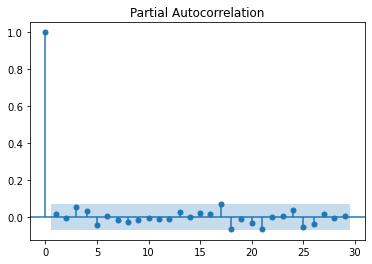

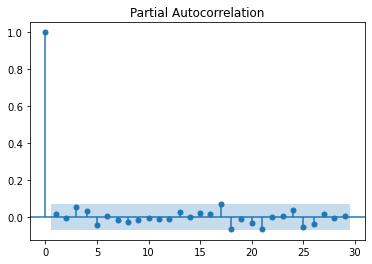

In [53]:
plot_pacf(birth_data) # To identify the value of p

In [54]:
# Model P = 2,3    d=0 &q = 3,4
birth_data.size

790

In [56]:
# divide the data into Test and Train

birth_train = birth_data[0:600]
birth_test = birth_data[600:790]

In [57]:
birth_train.size

600

In [59]:
birth_test.size

190

In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:
birth_model = ARIMA(birth_train,order=(2,1,3))

/Users/sundeep/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/sundeep/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided,

In [62]:
birth_model_fit = birth_model.fit()

/Users/sundeep/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [63]:
birth_model_fit.aic

5754.056294134658

In [76]:
birth_forecast = birth_model_fit.forecast(steps = 190)[0]

In [77]:
birth_forecast

array([51.43458913, 52.5985745 , 50.63245048, 50.79294069, 52.58251385,
       51.30604198, 50.43047266, 52.2228264 , 51.93245632, 50.42571943,
       51.68012362, 52.33444193, 50.73851496, 51.1490142 , 52.42625816,
       51.23795044, 50.79468912, 52.22743691, 51.75406851, 50.70685137,
       51.84285667, 52.13449122, 50.88262204, 51.41964348, 52.28818918,
       51.23973753, 51.09702585, 52.20485932, 51.65201152, 50.96525561,
       51.94729499, 51.99336676, 51.0448183 , 51.62265284, 52.17597154,
       51.28952264, 51.3441208 , 52.17172572, 51.60935523, 51.19586442,
       52.01281134, 51.90355289, 51.21142224, 51.77392863, 52.09252487,
       51.3702974 , 51.54403087, 52.1391182 , 51.61135401, 51.39750959,
       52.05421015, 51.85672752, 51.37362229, 51.88702217, 52.03761368,
       51.4692908 , 51.70512049, 52.11388253, 51.64566914, 51.57152815,
       52.08240409, 51.84466033, 51.52625908, 51.97306946, 52.00905957,
       51.57727325, 51.83534947, 52.09974567, 51.70233554, 51.72

In [74]:
birth_forecast

array([51.43458913, 52.5985745 , 50.63245048, 50.79294069, 52.58251385,
       51.30604198, 50.43047266, 52.2228264 , 51.93245632, 50.42571943,
       51.68012362, 52.33444193, 50.73851496, 51.1490142 , 52.42625816,
       51.23795044, 50.79468912, 52.22743691, 51.75406851, 50.70685137,
       51.84285667, 52.13449122, 50.88262204, 51.41964348, 52.28818918,
       51.23973753, 51.09702585, 52.20485932, 51.65201152, 50.96525561,
       51.94729499, 51.99336676, 51.0448183 , 51.62265284, 52.17597154])

In [67]:
birth_test

Date
2020-08-23     3
2020-08-24     2
2020-08-25    24
2020-08-26    26
2020-08-27    68
              ..
2021-02-24     8
2021-02-25    47
2021-02-26    27
2021-02-27    78
2021-02-28     0
Name: DailyBirth, Length: 190, dtype: int64

In [79]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

29.103635268014784